In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

In [ ]:
!pip install Flask


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Building our Model To train the data


In [ ]:
# temp = MobileNet( input_shape=(224,224,3), include_top= False )

In [ ]:
# temp.summary()

In [ ]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = True


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [ ]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

## Preparing our data using data generator

In [ ]:
num_train = 3327
num_val = 368 
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255,
     validation_split=0.1
)

train_data = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/data_processed_new", 
                                               target_size=(224,224), 
                                               batch_size=batch_size,
                                              subset='training'
                                  )

Found 3327 images belonging to 7 classes.


In [ ]:
test_data = train_datagen.flow_from_directory(directory= "/content/drive/MyDrive/data_processed_new", 
                                               target_size=(224,224), 
                                               batch_size=batch_size,
                                              subset='validation'
                                  )

Found 368 images belonging to 7 classes.


In [ ]:
len(train_data)

104

## Visualizing the data that is fed to train data gen

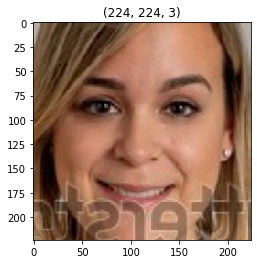

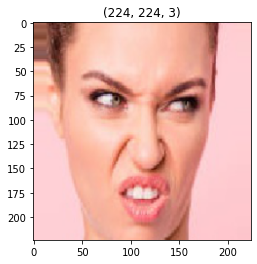

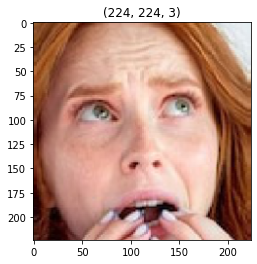

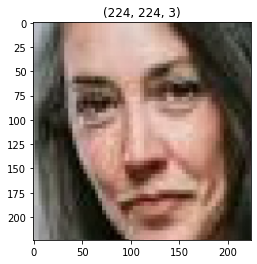

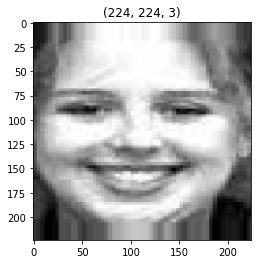

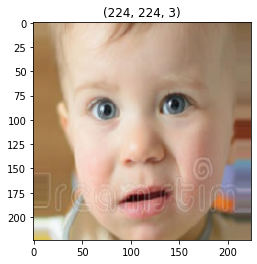

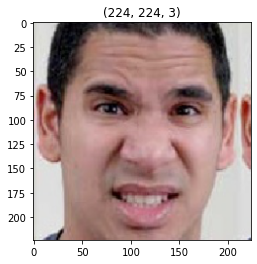

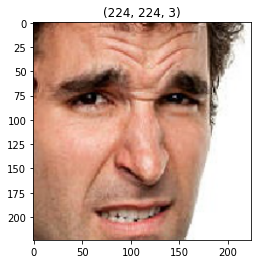

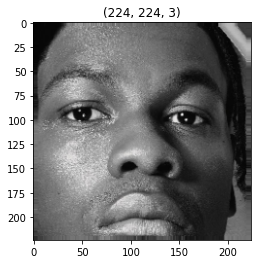

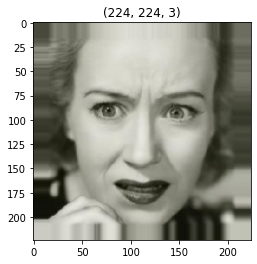

In [ ]:
t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

## Early stopping and Model checkpoint

In [ ]:
import os
os.chdir("/content/drive/MyDrive")

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 ,patience = 50, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]
# call_back = [mc]

In [ ]:
hist = model.fit_generator(train_data, 
                           epochs= 50, 
                           steps_per_epoch=num_train // batch_size,
                           validation_data=test_data,
                           validation_steps=num_val // batch_size, 
                           callbacks=call_back)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
103/103 [==============================] - ETA: 0s - loss: 4.6369 - accuracy: 0.3827
Epoch 1: val_accuracy improved from -inf to 0.35795, saving model to best_model.h5
103/103 [==============================] - 58s 537ms/step - loss: 4.6369 - accuracy: 0.3827 - val_loss: 13.7418 - val_accuracy: 0.3580
Epoch 2/50
103/103 [==============================] - ETA: 0s - loss: 1.4347 - accuracy: 0.5423
Epoch 2: val_accuracy improved from 0.35795 to 0.39773, saving model to best_model.h5
103/103 [==============================] - 53s 518ms/step - loss: 1.4347 - accuracy: 0.5423 - val_loss: 3.8829 - val_accuracy: 0.3977
Epoch 3/50
103/103 [==============================] - ETA: 0s - loss: 1.1814 - accuracy: 0.5997
Epoch 3: val_accuracy did not improve from 0.39773
103/103 [==============================] - 54s 521ms/step - loss: 1.1814 - accuracy: 0.5997 - val_loss: 2.5226 - val_accuracy: 0.3835
Epoch 4/50
103/103 [==============================] - ETA: 0s - loss: 1.0566 - accuracy: 

## Load weight


In [2]:
import keras

In [3]:
keras.__version__

'2.8.0'

In [ ]:
keras.models.load_model

In [ ]:
import tensorflow as tf

In [ ]:
new_model = tf.keras.models.load_model('best_model.h5')

In [ ]:
new_model.summary()

In [ ]:
new_model.pre

In [ ]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

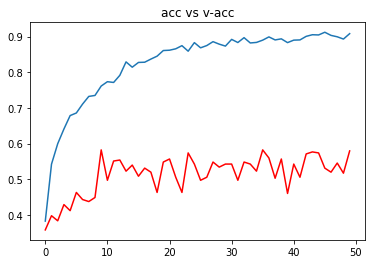

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

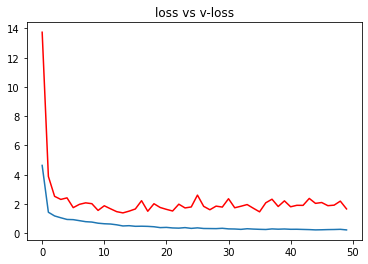

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

{0: 'angry',
 1: 'disguist',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprised'}

In [ ]:
path = "/content/drive/MyDrive/data_processed_new/angry/0_1.jpg"
img = load_img(path, target_size=(224,224) )

# i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(new_model.predict(input_arr))


In [ ]:
new_model.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_4')>

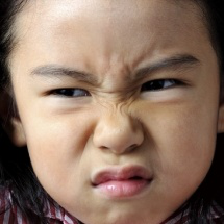